# Comparing Data
You'll often want to compare data in your dataset, to see if you can discern trends or relationships.

## Univariate Data
*Univariate* data is data that consist of only one variable or feature. While it may initially seem as though there's not much we can do to analyze univariate data, we've already seen that we can explore its distribution in terms of measures of central tendency and measures of variance. We've also seen how we can visualize this distribution using histograms and box plots.

Here's a reminder of how you can visualize the distribution of univariate data, using our student grade data with a few additional observations in the sample:

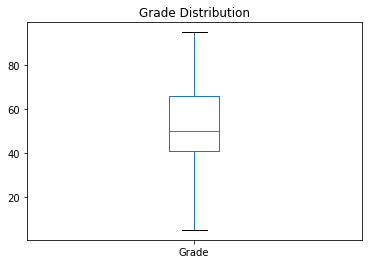

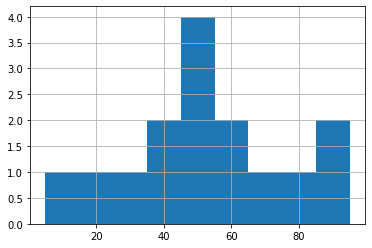

           Grade
count  15.000000
mean   51.533333
std    24.642781
min     5.000000
25%    41.000000
50%    50.000000
75%    66.000000
max    95.000000
median: 50.0


In [1]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

plt.figure()
df['Grade'].plot(kind='box', title='Grade Distribution')
plt.figure()
df['Grade'].hist(bins=9)
plt.show()
print(df.describe())
print('median: ' + str(df['Grade'].median()))

## Bivariate and Multivariate Data
It can often be useful to compare *bivariate* data; in other words, compare two variables, or even more (in which case we call it *multivariate* data).

For example, our student data includes three numeric variables for each student: their salary, the number of hours they work per week, and their final school grade. Run the following code to see an enlarged sample of this data as a table:

In [2]:
import pandas as pd

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

df[['Name', 'Salary', 'Hours', 'Grade']]

,Name,Salary,Hours,Grade
0,Dan,50000,41,50
1,Joann,54000,40,50
2,Pedro,50000,36,46
3,Rosie,189000,17,95
4,Ethan,55000,35,50
5,Vicky,40000,39,5
6,Frederic,59000,40,57
7,Jimmie,42000,45,42
8,Rhonda,47000,41,26
9,Giovanni,78000,35,72


Let's suppose you want to compare the distributions of these variables. You might simply create a boxplot for each variable, like this:

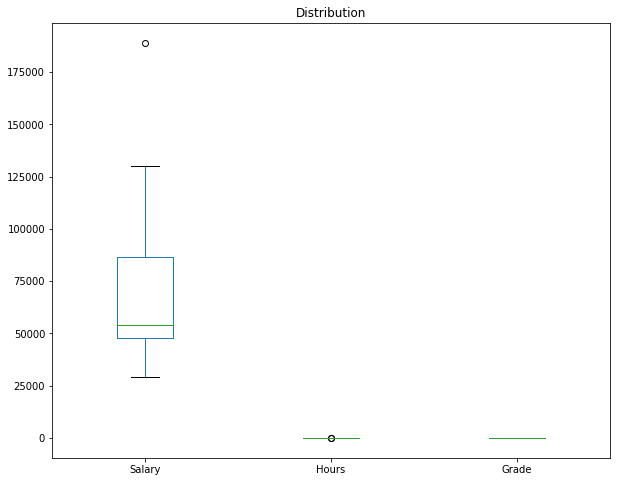

In [3]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})


df.plot(kind='box', title='Distribution', figsize = (10,8))
plt.show()

Hmm, that's not particularly useful is it?

The problem is that the data are all measured in different scales. Salaries are typically in tens of thousands, while hours and grades are in single or double digits.

### Normalizing Data
When you need to compare data in different units of measurement, you can *normalize* or *scale* the data so that the values are measured in the same proportional scale. For example, in Python you can use a MinMax scaler to normalize multiple numeric variables to a proportional value between 0 and 1 based on their minimum and maximum values. Run the following cell to do this:

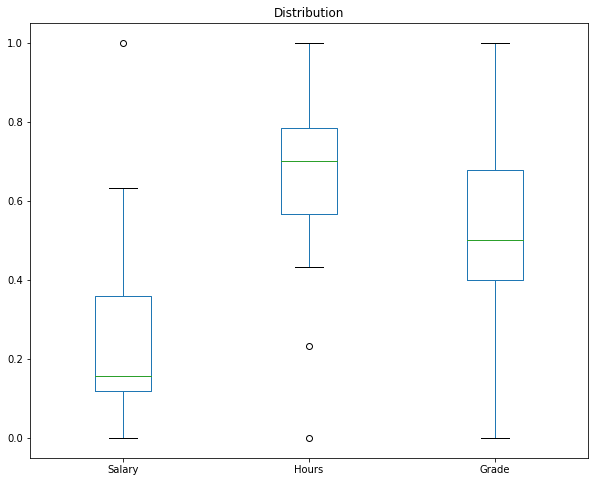

In [4]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Normalize the data
scaler = MinMaxScaler()
df[['Salary', 'Hours', 'Grade']] = scaler.fit_transform(df[['Salary', 'Hours', 'Grade']])

# Plot the normalized data
df.plot(kind='box', title='Distribution', figsize = (10,8))
plt.show()

Now the numbers on the y axis aren't particularly meaningful, but they're on a similar scale.

### Comparing Bivariate Data with a Scatter Plot
When you need to compare two numeric values, a scatter plot can be a great way to see if there is any apparent relationship between them so that changes in the value of one variable affect the value of the other.

Let's look at a scatter plot of *Salary* and *Grade*:

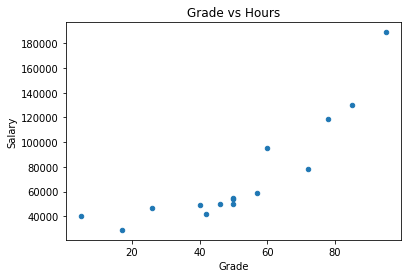

In [5]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Create a scatter plot of Salary vs Grade
df.plot(kind='scatter', title='Grade vs Hours', x='Grade', y='Salary')
plt.show()


Look closely at the scatter plot. Can you see a diagonal trend in the plotted points, rising up to the right? It looks as though the higher the student's grade is, the higher their salary is.

You can see the trend more clearly by adding a *line of best fit* (sometimes called a *trendline*) to the plot:

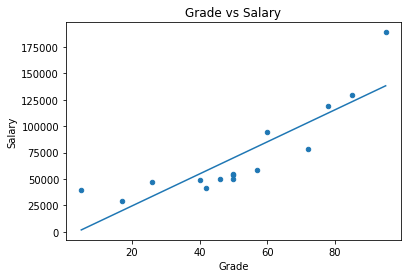

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Create a scatter plot of Salary vs Grade
df.plot(kind='scatter', title='Grade vs Salary', x='Grade', y='Salary')

# Add a line of best fit
plt.plot(np.unique(df['Grade']), np.poly1d(np.polyfit(df['Grade'], df['Salary'], 1))(np.unique(df['Grade'])))

plt.show()

The line of best fit makes it clearer that there is some apparent *colinearity* between these variables (the relationship is *colinear* if one variable's value increases or decreases in line with the other).

### Correlation
The apparently colinear relationship you saw in the scatter plot can be verified by calculating a statistic that quantifies the relationship between the two variables. The statistic usually used to do this is *correlation*, though there is also a statistic named *covariance* that is sometimes used. Correlation is generally preferred because the value it produces is more easily interpreted.

A correlation value is always a number between ***-1*** and ***1***.
- A positive value indicates a positive correlation (as the value of variable *x* increases, so does the value of variable *y*).
- A negative value indicates a negative correlation (as the value of variable *x* increases, the value of variable *y* decreases).
- The closer to zero the correlation value is, the weaker the correlation between *x* and *y*.
- A correlation of exactly zero means there is no apparent relationship between the variables.

The formula to calculate correlation is:

\begin{equation}r_{x,y} = \frac{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})(y_{i} -\bar{y})}{\sqrt{\displaystyle\sum_{i=1}^{n} (x_{i} -\bar{x})^{2}(y_{i} -\bar{y})^{2}}}\end{equation}

**r<sub>x, y</sub>** is the notation for the *correlation between x and y*.

The formula is pretty complex, but fortunately Python makes it very easy to calculate the correlation by using the ***corr*** function:

In [7]:
import pandas as pd

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000],
                   'Hours':[41,40,36,17,35,39,40],
                   'Grade':[50,50,46,95,50,5,57]})

# Calculate the correlation between *Salary* and *Grade*
print(df['Grade'].corr(df['Salary']))

0.8149286388911882


In this case, the correlation is just over 0.8; making it a reasonably high positive correlation that indicates salary increases in line with grade.

Let's see if we can find a correlation between *Grade* and *Hours*:

Correlation: -0.8109119058459785


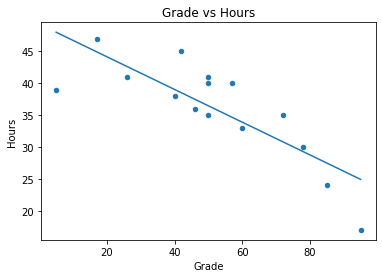

In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

r = df['Grade'].corr(df['Hours'])
print('Correlation: ' + str(r))

# Create a scatter plot of Salary vs Grade
df.plot(kind='scatter', title='Grade vs Hours', x='Grade', y='Hours')

# Add a line of best fit-
plt.plot(np.unique(df['Grade']), np.poly1d(np.polyfit(df['Grade'], df['Hours'], 1))(np.unique(df['Grade'])))
plt.show()


In this case, the correlation value is just under -0.8; meaning a fairly strong negative correlation in which the number of hours worked decreases as the grade increases. The line of best fit on the scatter plot corroborates this statistic.

It's important to remember that *correlation* **is not** *causation*. In other words, even though there's an apparent relationship, you can't say for sure that one variable is the cause of the other. In this example, we can say that students who achieved higher grades tend to work shorter hours; but we ***can't*** say that those who work shorter hours do so *because* they achieved a high grade!

## Least Squares Regression
In the previous examples, we drew a line on a scatter plot to show the *best fit* of the data. In many cases, your initial attempts to identify any colinearity might involve adding this kind of line by hand (or just mentally visualizing it); but as you may suspect from the use of the *numpy.**polyfit*** function in the code above, there are ways to calculate the coordinates for this line mathematically. One of the most commonly used techniques is *least squares regression*, and that's what we'll look at now.

Cast your mind back to when you were learning how to solve linear equations, and recall that the *slope-intercept* form of a linear equation lookes like this:

\begin{equation}y = mx + b\end{equation}

In this equation, *y* and *x* are the coordinate variables, *m* is the slope of the line, and *b* is the y-intercept of the line.

In the case of our scatter plot for our former-student's working hours, we already have our values for *x* (*Grade*) and *y* (*Hours*), so we just need to calculate the intercept and slope of the straight line that lies closest to those points. Then we can form a linear equation that calculates the a new *y* value on that line for each of our *x* (*Grade*) values - to avoid confusion, we'll call this new *y* value *f(x)* (because it's the output from a linear equation function based on *x*). The difference between the original *y* (*Hours*) value and the *f(x)* value is the *error* between our regression line of best fit and the actual *Hours* worked by the former student. Our goal is to calculate the slope and intercept for a line with the lowest overall error.

Specifically, we define the overall error by taking the error for each point, squaring it, and adding all the squared errors together. The line of best fit is the line that gives us the lowest value for the sum of the squared errors - hence the name *least squares regression*.

So how do we accomplish this? First we need to calculate the slope (*m*), which we do using this formula (in which *n* is the number of observations in our data sample):

\begin{equation}m = \frac{n(\sum{xy}) - (\sum{x})(\sum{y})}{n(\sum{x^{2}})-(\sum{x})^{2}}\end{equation}

After we've calculated the slope (*m*), we can use is to calculate the intercept (*b*) like this:

\begin{equation}b = \frac{\sum{y} - m(\sum{x})}{n}\end{equation}

Let's look at a simple example that compares the number of hours of nightly study each student undertook with the final grade the student achieved:

| Name     | Study | Grade |
|----------|-------|-------|
| Dan      | 1     | 50    |
| Joann    | 0.75  | 50    |
| Pedro    | 0.6   | 46    |
| Rosie    | 2     | 95    |
| Ethan    | 1     | 50    |
| Vicky    | 0.2   | 5     |
| Frederic | 1.2   | 57    |

First, let's take each *x* (Study) and *y* (Grade) pair and calculate *x<sup>2</sup>* and *xy*, because we're going to need these to work out the slope:

| Name     | Study | Grade | x<sup>2</sup> | xy   |
|----------|-------|-------|------|------|
| Dan      | 1     | 50    | 1    | 50   |
| Joann    | 0.75  | 50    | 0.55 | 37.5 |
| Pedro    | 0.6   | 46    | 0.36 | 27.6 |
| Rosie    | 2     | 95    | 4    | 190  |
| Ethan    | 1     | 50    | 1    | 50   |
| Vicky    | 0.2   | 5     | 0.04 | 1    |
| Frederic | 1.2   | 57    | 1.44 | 68.4 |

Now we'll sum *x*, *y*, *x<sup>2</sup>*, and *xy*:

| Name     | Study | Grade | x<sup>2</sup> | xy   |
|----------|-------|-------|------|------|
| Dan      | 1     | 50    | 1    | 50   |
| Joann    | 0.75  | 50    | 0.55 | 37.5 |
| Pedro    | 0.6   | 46    | 0.36 | 27.6 |
| Rosie    | 2     | 95    | 4    | 190  |
| Ethan    | 1     | 50    | 1    | 50   |
| Vicky    | 0.2   | 5     | 0.04 | 1    |
| Frederic | 1.2   | 57    | 1.44 | 68.4 |
| **&Sigma;**      | **6.75**  | **353**   | **8.4025**| **424.5**  |

OK, now we're ready to calculate the slope for our *7* observations:

\begin{equation}m = \frac{(7\times 424.5) - (6.75\times353)}{(7\times8.4025)-6.75^{2}}\end{equation}

Which is:

\begin{equation}m = \frac{2971.5 - 2382.75}{58.8175-45.5625}\end{equation}

So:

\begin{equation}m = \frac{588.75}{13.255} \approx 44.4172\end{equation}

Now we can calculate *b*:

\begin{equation}b = \frac{353 - (44.4172\times6.75)}{7}\end{equation}

Which simplifies to:

\begin{equation}b = \frac{53.18389}{7} = 7.597699\end{equation}

Now we have our linear function:

\begin{equation}f(x) = 44.4172x + 7.597699\end{equation}

We can use this for each *x* (Study) value to calculate the *y* values for the regression line (*f(x)*), and we can subtract the original *y* (Grade) from these to calculate the error for each point:

| Name     | Study | Grade | *f(x)* | Error |
|----------|-------|-------|------|------ |
| Dan      | 1     | 50    |52.0149 |2.0149 |
| Joann    | 0.75  | 50    |40.9106 |-9.0894|
| Pedro    | 0.6   | 46    |34.2480 |-11.752|
| Rosie    | 2     | 95    |96.4321 |1.4321 |
| Ethan    | 1     | 50    |52.0149 |2.0149 |
| Vicky    | 0.2   | 5     |16.4811 |11.4811|
| Frederic | 1.2   | 57    |60.8983 |3.8983 |

As you can see, the *f(x)* values are mostly quite close to the actual *Grade* values, and the errors (which when we're comparing estimated values from a function with actual known values we we often call *residuals*) are generally pretty small.

Let's plot the least squares regression line with the actual values:

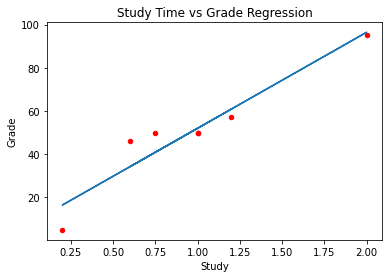

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic'],
                   'Study':[1,0.75,0.6,2,1,0.2,1.2],
                   'Grade':[50,50,46,95,50,5,57],
                   'fx':[52.0159,40.9106,34.2480,96.4321,52.0149,16.4811,60.8983]})

# Create a scatter plot of Study vs Grade
df.plot(kind='scatter', title='Study Time vs Grade Regression', x='Study', y='Grade', color='red')

# Plot the regression line
plt.plot(df['Study'],df['fx'])

plt.show()

In this case, the line fits the middle values fairly well, but is less accurate for the outlier at the low end. This is often the case, which is why statisticians and data scientists often *treat* outliers by removing them or applying a threshold value; though in this example there are too few data points to conclude that the data points are really outliers.

Let's look at a slightly larger dataset and apply the same approach to compare *Grade* and *Salary*:

slope: 1516.1378856076408
y-intercept: -5731.639038313754


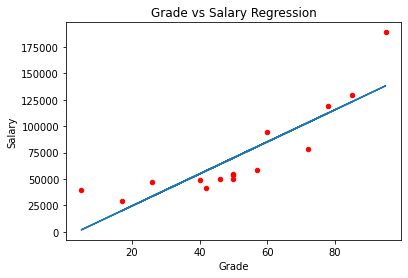

,Grade,Salary,fx,error
0,50,50000,70075.255242,20075.255242
1,50,54000,70075.255242,16075.255242
2,46,50000,64010.703700,14010.703700
3,95,189000,138301.460094,-50698.539906
4,50,55000,70075.255242,15075.255242
5,5,40000,1849.050390,-38150.949610
6,57,59000,80688.220441,21688.220441
7,42,42000,57946.152157,15946.152157
8,26,47000,33687.945987,-13312.054013
9,72,78000,103430.288725,25430.288725


In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Calculate least squares regression line
df['x2'] = df['Grade']**2
df['xy'] = df['Grade'] * df['Salary']
x = df['Grade'].sum()
y = df['Salary'].sum()
x2 = df['x2'].sum()
xy = df['xy'].sum()
n = df['Grade'].count()
m = ((n*xy) - (x*y))/((n*x2)-(x**2))
b = (y - (m*x))/n
df['fx'] = (m*df['Grade']) + b
df['error'] = df['fx'] - df['Salary']

print('slope: ' + str(m))
print('y-intercept: ' + str(b))

# Create a scatter plot of Grade vs Salary
df.plot(kind='scatter', title='Grade vs Salary Regression', x='Grade', y='Salary', color='red')

# Plot the regression line
plt.plot(df['Grade'],df['fx'])

plt.show()

# Show the original x,y values, the f(x) value, and the error
df[['Grade', 'Salary', 'fx', 'error']]

In this case, we used Python expressions to calculate the *slope* and *y-intercept* using the same approach and formula as before. In practice, Python provides great support for statistical operations like this; and you can use the ***linregress*** function in the *scipy.stats* package to retrieve the *slope* and *y-intercept* (as well as the *correlation*, *p-value*, and *standard error*) for a matched array of *x* and *y* values (we'll discuss *p-values* later!).

Here's the Python code to calculate the regression line variables using the ***linregress*** function:

slope: 1516.1378856076406
y-intercept: -5731.639038313733


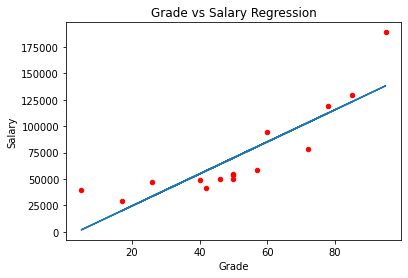

,Grade,Salary,fx,error
0,50,50000,70075.255242,20075.255242
1,50,54000,70075.255242,16075.255242
2,46,50000,64010.703700,14010.703700
3,95,189000,138301.460094,-50698.539906
4,50,55000,70075.255242,15075.255242
5,5,40000,1849.050390,-38150.949610
6,57,59000,80688.220441,21688.220441
7,42,42000,57946.152157,15946.152157
8,26,47000,33687.945987,-13312.054013
9,72,78000,103430.288725,25430.288725


In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

# Get the regression line slope and intercept
m, b, r, p, se = stats.linregress(df['Grade'], df['Salary'])

df['fx'] = (m*df['Grade']) + b
df['error'] = df['fx'] - df['Salary']

print('slope: ' + str(m))
print('y-intercept: ' + str(b))

# Create a scatter plot of Grade vs Salary
df.plot(kind='scatter', title='Grade vs Salary Regression', x='Grade', y='Salary', color='red')

# Plot the regression line
plt.plot(df['Grade'],df['fx'])

plt.show()

# Show the original x,y values, the f(x) value, and the error
df[['Grade', 'Salary', 'fx', 'error']]


Note that the *slope* and *y-intercept* values are the same as when we worked them out using the formula.

Similarly to the simple study hours example, the regression line doesn't fit the outliers very well. In this case, the extremes include a student who scored only 5, and a student who scored 95. Let's see what happens if we remove these students from our sample:

slope: 1424.5008823224111
y-intercept: -7822.237984844818


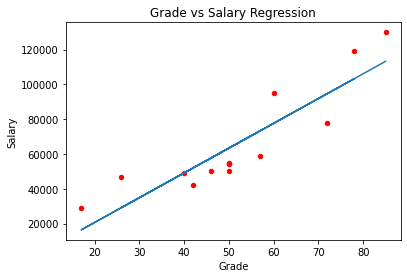

,Grade,Salary,fx,error
0,50,50000,63402.806131,13402.806131
1,50,54000,63402.806131,9402.806131
2,46,50000,57704.802602,7704.802602
4,50,55000,63402.806131,8402.806131
6,57,59000,73374.312308,14374.312308
7,42,42000,52006.799073,10006.799073
8,26,47000,29214.784956,-17785.215044
9,72,78000,94741.825542,16741.825542
10,78,119000,103288.830836,-15711.169164
11,60,95000,77647.814954,-17352.185046


In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

df = pd.DataFrame({'Name': ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny'],
                   'Salary':[50000,54000,50000,189000,55000,40000,59000,42000,47000,78000,119000,95000,49000,29000,130000],
                   'Hours':[41,40,36,17,35,39,40,45,41,35,30,33,38,47,24],
                   'Grade':[50,50,46,95,50,5,57,42,26,72,78,60,40,17,85]})

df = df[(df['Grade'] > 5) & (df['Grade'] < 95)]

# Get the regression line slope and intercept
m, b, r, p, se = stats.linregress(df['Grade'], df['Salary'])

df['fx'] = (m*df['Grade']) + b
df['error'] = df['fx'] - df['Salary']

print('slope: ' + str(m))
print('y-intercept: ' + str(b))

# Create a scatter plot of Grade vs Salary
df.plot(kind='scatter', title='Grade vs Salary Regression', x='Grade', y='Salary', color='red')

# Plot the regression line
plt.plot(df['Grade'],df['fx'])

plt.show()

# Show the original x,y values, the f(x) value, and the error
df[['Grade', 'Salary', 'fx', 'error']]


With the outliers removed, the line is a slightly better overall fit to the data.

One of the neat things about regression is that it gives us a formula and some constant values that we can use to estimate a *y* value for any *x* value. We just need to apply the linear function using the *slope* and *y-intercept* values we've calculated from our sample data. For example, suppose a student named Fabio graduates from our school with a final grade of **62**. We can use our linear function with the *slope* and *y-intercept* values we calculated with Python to estimate what salary he can expect to earn:

\begin{equation}f(x) = (1424.50\times62) - 7822.24 \approx 80,497 \end{equation}
